# Regularization

_(In this example we intensionally, take the test set as 10% of the entire available dataset to reproduce overfitting)_

An overfitted model is a statistical model that contains more parameters than can be justified by the data. The essence of overfitting is to have unknowingly extracted some of the residual variation (i.e. the noise) as if that variation represented underlying model structure.

Methods to avoid Over-fitting:
Following are the commonly used methodologies :
1. Cross-Validation : Cross Validation in its simplest form is a one round validation, where we leave one sample as in-time validation and rest for training the model. But for keeping lower variance a higher fold cross validation is preferred.
2. Early Stopping : Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit.
3. Pruning : Pruning is used extensively while building CART models. It simply removes the nodes which add little predictive power for the problem in hand.
4. __Regularization__ : This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.



__Regularization__ is a technique used in an attempt to solve the overfitting[1] problem in statistical models.*

First of all, I want to clarify how this problem of overfitting arises.

When someone wants to model a problem, let's say trying to predict the wage of someone based on his age, he will first try a linear regression model with age as an independent variable and wage as a dependent one. This model will mostly fail, since it is too simple.

Then, you might think: well, I also have the age, the sex and the education of each individual in my data set. I could add these as explaining variables.

Your model becomes more interesting and more complex. You measure its accuracy regarding a loss metric L(X,Y) where X is your design matrix and Y is the observations (also denoted targets) vector (here the wages).

You find out that your result are quite good but not as perfect as you wish.

So you add more variables: location, profession of parents, social background, number of children, weight, number of books, preferred color, best meal, last holidays destination and so on and so forth.

Your model will do good but it is probably overfitting, i.e. it will probably have poor prediction and generalization power: it sticks too much to the data and the model has probably learned the background noise while being fit. This isn't of course acceptable.

So how do you solve this?

It is here where the regularization technique comes in handy.

You penalize your loss function by adding a multiple of an L1 (LASSO[2]) or an L2 (Ridge[3]) norm of your weights vector w (it is the vector of the learned parameters in your linear regression). You get the following equation:

L(X,Y)+λN(w)

(N is either the L1, L2 or any other norm)

This will help you avoid overfitting and will perform, at the same time, features selection for certain regularization norms (the L1 in the LASSO does the job).

Finally you might ask: OK I have everything now. How can I tune in the regularization term λ?

One possible answer is to use cross-validation: you divide your training data, you train your model for a fixed value of λ and test it on the remaining subsets and repeat this procedure while varying λ. Then you select the best λ that minimizes your loss function.


__Types of regularization:-__
1. The L1 regularization (also called Lasso)
    - The L1 regularization adds a penalty equal to the sum of the absolute value of the coefficients. 
2. The L2 regularization (also called Ridge)
    - The L2 regularization adds a penalty equal to the sum of the squared value of the coefficients.
3. The L1/L2 regularization (also called Elastic net)
    - Elastic-net is a mix of both L1 and L2 regularizations. A penalty is applied to the sum of the absolute values and to the sum of the squared values:
  
  
  
__In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j. How does reducing the coefficients will help us?__



## Load Data and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.special import inv_boxcox
from math import sqrt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import svm
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from numpy import sort
from pandas import Series, DataFrame

In [2]:
train = pd.read_csv("data/train.csv")
#test = pd.read_csv("data/test.csv")

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)
random_state = 42

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Analysis

In [5]:
print("Train dataset shape : ",train.shape)

Train dataset shape :  (1460, 81)


In [6]:
print("Number of datapoints in the train data set : {} and the number of attributes including label : {}".format(*(train.shape)))
print("Column in the input data : ")
train.info()

Number of datapoints in the train data set : 1460 and the number of attributes including label : 81
Column in the input data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd

In [7]:
#Look for all columns
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

__Observations__ :
-  There are total of 1460 datapoints in training set.
-  There are total of 1459 datapoints in training set.
-  Independent attributes : 80
-  Dependent variable : 1
-  Target/dependent variable is a int
-  There are mix of int & Object datatypes in independent variables.
-  We need to take care of the __null__ values in some independent variables later on.

In [8]:
#look at some sample data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
#Look for catigorical data
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

In [10]:
#Analyze the train set from a statistical point
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# Checking Categorical Data
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [12]:
# Checking Numerical Data
train.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [13]:
cat = len(train.select_dtypes(include=['object']).columns)
num = len(train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  43 categorical + 38 numerical = 81 features


__Observations__ :
-  There are a lot of categoricl values in tthe dataset, as the for many attributes we can see that the unique values are low.
-  The null values are not considered for count

### Create a Test/Train Set

It may sound strange to voluntarily set aside part of the data at this stage. After all, we have only taken a quick glance at the data, and surely we should learn a whole lot more about it before we decide what algorithms to use, right? This is true, but our brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if we look at the test set, we may stumble upon some seemingly interesting pattern in the test data that leads us to select a particular kind of Machine Learning model. When we estimate the generalization error using the test set, our estimate will be too optimistic and we will launch a system that will not perform as well as expected. This is called data snooping bias. Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset, and set them aside:

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size=0.95, random_state=random_state)
print("Train data shape : ", train_set.shape)
print("Test data shape : ", test_set.shape)

Train data shape :  (73, 81)
Test data shape :  (1387, 81)


## Data preparation

### Data Cleaning - Handling Missing Values

Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them.

__Analyze the frequency of null/nan values__

In [15]:
#Columsn with null/NAN values
train_set_nan_freq = train_set.isnull().sum().to_frame()
train_set_nan_freq['nan_frequency'] = (train_set_nan_freq[0]/train_set.shape[0])*100
train_set_nan_freq.sort_values(by=['nan_frequency'], ascending=False)

,0,nan_frequency
PoolQC,73,100.000000
MiscFeature,72,98.630137
Alley,66,90.410959
Fence,59,80.821918
FireplaceQu,36,49.315068
LotFrontage,10,13.698630
GarageCond,4,5.479452
GarageType,4,5.479452
GarageYrBlt,4,5.479452
GarageFinish,4,5.479452


Now we have to anlyse each and every column to fset missing values.

In [16]:
columns_with_nan = train_set_nan_freq.loc[train_set_nan_freq['nan_frequency']>0].index.tolist()
columns_with_nan

['LotFrontage',
 'Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [17]:
for col in columns_with_nan:
    print("----- Column/Feature Name -----", col)
    if train_set[col].dtypes=='object' :
        print(train_set[col].describe())
    elif train_set[col].dtypes=='int64' or train_set[col].dtypes=='float64' :
        print(train_set[col].describe())

----- Column/Feature Name ----- LotFrontage
count     63.000000
mean      67.539683
std       22.657923
min       24.000000
25%       54.000000
50%       65.000000
75%       81.000000
max      153.000000
Name: LotFrontage, dtype: float64
----- Column/Feature Name ----- Alley
count        7
unique       2
top       Pave
freq         4
Name: Alley, dtype: object
----- Column/Feature Name ----- BsmtQual
count     71
unique     3
top       Gd
freq      34
Name: BsmtQual, dtype: object
----- Column/Feature Name ----- BsmtCond
count     71
unique     3
top       TA
freq      67
Name: BsmtCond, dtype: object
----- Column/Feature Name ----- BsmtExposure
count     71
unique     4
top       No
freq      45
Name: BsmtExposure, dtype: object
----- Column/Feature Name ----- BsmtFinType1
count      71
unique      6
top       GLQ
freq       25
Name: BsmtFinType1, dtype: object
----- Column/Feature Name ----- BsmtFinType2
count      71
unique      5
top       Unf
freq       63
Name: BsmtFinType2, dtyp

Inference of missing values:-
1. FireplaceQu - Set to most occurance category __Gd__ 
2. LotFrontage - Set to mean of __70.343849__
3. GarageType - Set to most occurance category __Attchd__  
4. GarageYrBlt - Set to mean of __1978.662138__ 
5. GarageFinish - Set to most occurance category __Unf__
6. GarageQual - Set to most occurance category __TA__  
7. GarageCond - Set to most occurance category __TA__  
8. BsmtExposure - Set to most occurance category __No__
9. BsmtQual - Set to most occurance category __TA__    
10. BsmtCond - Set to most occurance category __TA__    
11. BsmtFinType1 - Set to most occurance category __Unf__
12. BsmtFinType2 - Set to most occurance category __Unf__
13. MasVnrArea - Set to mean of __103.771945__
14. MasVnrType - Set to most occurance category __None__
16. Electrical - Set to most occurance category __SBrkr__
17. PoolQC - __Drop__, too many null values
18. MiscFeature - __Drop__, too many null values
19. Alley - __Drop__, too many null values
20. Fence - __Drop__, too many null values

__The missing categorical(String) values can be handles in following ways:- __
1. Replace with the most common value for the feature.
2. Replace with Unknown, which will also become a new category.
3. Consider the rows that have the value as training set & the ones not having the value as test set. Then train a KNN to find the missing value.

__The missing numeric values can be handles in following ways:- __
1. Mean
2. SD
3. Replace with the most common value for the feature.

In [18]:
#Dropping above columns from dataset.
train_set.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

/Users/samyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Impute Missing Values

Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.

For example, if you choose to impute with mean column values, these mean column values will need to be stored to file for later use on new data that has missing values.

In [19]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

    
    
train_set_with_nan = train_set[['LotFrontage','GarageYrBlt','MasVnrArea',
                                        'FireplaceQu','GarageType','GarageFinish',
                                        'GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond',
                                        'BsmtFinType1','BsmtFinType2','MasVnrType','Electrical']]   
train_set_without_nan = DataFrameImputer().fit_transform(train_set_with_nan)


#Remove imputed columns from train set
train_set.drop(['LotFrontage','GarageYrBlt','MasVnrArea','FireplaceQu','GarageType','GarageFinish',
                'GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond',
                'BsmtFinType1','BsmtFinType2','MasVnrType','Electrical'], axis=1, inplace=True)

#Concate same coulmns with imputed values
train_set_imputed = pd.concat([train_set,train_set_without_nan],axis=1)

/Users/samyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
#Verify that missing values are taken care off : Columsn with null/NAN values
train_set_imputed_freq = train_set_imputed.isnull().sum().to_frame()
train_set_imputed_freq['nan_frequency'] = (train_set_imputed_freq[0]/train_set_imputed_freq.shape[0])*100
train_set_imputed_freq.sort_values(by=['nan_frequency'], ascending=False)

,0,nan_frequency
Id,0,0.0
PavedDrive,0,0.0
MiscVal,0,0.0
PoolArea,0,0.0
ScreenPorch,0,0.0
3SsnPorch,0,0.0
EnclosedPorch,0,0.0
OpenPorchSF,0,0.0
WoodDeckSF,0,0.0
GarageArea,0,0.0


__All nan values in data is taken care by diffent strategies__

### Prepare Test dataset

In [21]:
#Dropping above columns from dataset.
test_set.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

test_set_with_nan = test_set[['LotFrontage','GarageYrBlt','MasVnrArea',
                                        'FireplaceQu','GarageType','GarageFinish',
                                        'GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond',
                                        'BsmtFinType1','BsmtFinType2','MasVnrType','Electrical']]   
test_set_without_nan = DataFrameImputer().fit_transform(test_set_with_nan)


#Remove imputed columns from train set
test_set.drop(['LotFrontage','GarageYrBlt','MasVnrArea','FireplaceQu','GarageType','GarageFinish',
                'GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtCond',
                'BsmtFinType1','BsmtFinType2','MasVnrType','Electrical'], axis=1, inplace=True)

#Concate same coulmns with imputed values
test_set_imputed = pd.concat([test_set,test_set_without_nan],axis=1)
print(test_set_imputed.shape)

/Users/samyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1387, 77)


/Users/samyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Handling Text and Categorical Attributes

#### Convert non-nonumeric attributes to numeric representation

In [22]:
#Divide the train & test dataset into dependent & independent variable
housing_X_train = train_set_imputed.drop(['SalePrice'], axis=1)
housing_y_train = train_set_imputed[['SalePrice']]

housing_X_test = test_set_imputed.drop(['SalePrice'], axis=1)
housing_y_test = test_set_imputed[['SalePrice']]

print(housing_X_train.shape)
print(housing_X_test.shape)

(73, 76)
(1387, 76)


In [23]:
#Features with object datatypes
housing_data_object_column = housing_X_train.select_dtypes(include=['object']).columns.tolist()
housing_data_object_column

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'MasVnrType',
 'Electrical']

##### Label encoding : Convert string to integer

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in housing_X_train.columns.values:
    # Encoding only categorical variables
    if housing_X_train[col].dtypes=='object':        
        # Using whole data to form an exhaustive list of levels
        data=housing_X_train[col].append(housing_X_test[col])
        #data=housing_X_train[col]
        le.fit(data.values)
        housing_X_train[col]=le.transform(housing_X_train[col])
        housing_X_test[col]=le.transform(housing_X_test[col])
        
housing_X_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage,GarageYrBlt,MasVnrArea,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,MasVnrType,Electrical
401,402,20,3,8767,1,0,3,0,4,0,5,2,2,0,2,7,5,2005,2005,1,1,12,13,2,4,2,24,0,1286,1310,1,0,1,1310,0,0,1310,0,0,2,0,3,1,2,6,6,1,2,400,2,0,0,0,0,0,0,0,7,2006,6,5,65.000000,2005.000000,0.0,2,1,0,4,4,0,2,3,2,5,2,4
702,703,60,3,12438,1,0,3,0,4,0,22,2,2,0,5,8,5,2006,2006,3,1,12,13,0,4,2,0,0,1234,1234,1,0,1,1264,1312,0,2576,0,0,2,1,4,1,0,10,6,1,3,666,2,324,100,0,0,0,0,0,7,2006,6,5,82.000000,2006.000000,466.0,2,3,0,4,4,3,0,1,5,5,1,4
1129,1130,90,4,7200,1,3,3,0,4,0,17,2,2,2,6,5,5,1980,1980,1,1,8,8,3,4,1,936,0,0,936,1,4,1,936,0,0,936,1,0,1,0,2,1,3,4,6,0,2,672,2,49,0,0,0,0,0,0,8,2007,8,4,60.000000,1980.000000,180.0,2,5,2,4,4,1,2,3,2,5,1,4
565,566,70,3,6858,1,3,0,0,0,0,18,2,2,0,5,6,4,1915,1950,1,1,13,14,3,4,2,0,0,806,806,1,4,0,841,806,0,1647,1,0,1,1,4,1,1,6,6,0,1,216,2,0,66,136,0,0,0,0,5,2010,8,4,66.000000,1920.000000,0.0,2,5,2,4,4,3,2,3,5,5,2,1
1021,1022,20,3,7406,1,3,3,0,4,0,5,2,2,0,2,7,5,2006,2006,1,1,12,13,2,4,2,684,0,515,1199,1,0,1,1220,0,0,1220,1,0,2,0,2,1,2,6,6,0,2,632,2,105,54,0,0,0,0,0,7,2006,6,5,64.000000,2006.000000,84.0,2,1,1,4,4,0,2,3,2,5,3,4
1025,1026,20,3,7700,1,3,3,0,0,0,5,2,2,0,2,5,5,1972,1972,1,1,12,13,3,4,1,138,468,276,882,1,4,1,882,0,0,882,1,0,1,0,3,1,3,5,6,0,2,461,2,96,0,0,0,0,0,0,3,2007,8,4,70.000000,1980.000000,0.0,2,5,2,4,4,3,3,3,3,4,2,4
1104,1105,160,4,2016,1,3,3,0,4,0,2,2,2,4,5,5,5,1970,1970,1,1,6,6,3,4,1,0,0,630,630,1,4,1,630,672,0,1302,0,0,2,1,3,1,3,6,6,0,2,440,2,0,0,0,0,0,0,0,4,2007,8,4,24.000000,1970.000000,304.0,2,5,2,4,4,3,3,3,5,5,1,4
205,206,20,3,11851,1,3,3,0,0,0,8,2,2,0,2,7,5,1990,1990,1,1,6,6,3,4,2,0,0,1424,1424,1,0,1,1442,0,0,1442,0,0,2,0,3,1,3,5,6,0,2,500,2,0,34,0,508,0,0,0,5,2009,8,4,99.000000,1990.000000,0.0,2,1,1,4,4,3,2,3,5,5,2,4
34,35,120,3,7313,1,3,3,0,4,0,16,2,2,4,2,9,5,2005,2005,3,1,8,8,0,4,2,1153,0,408,1561,1,0,1,1561,0,0,1561,1,0,2,0,2,1,0,6,6,1,2,556,2,203,47,0,0,0,0,0,8,2007,8,4,60.000000,2005.000000,246.0,2,1,0,4,4,3,0,3,2,5,1,4
775,776,120,4,4500,1,3,3,0,2,0,11,2,2,4,2,6,5,1998,1998,3,1,12,13,3,4,2,866,0,338,1204,1,0,1,1204,0,0,1204,1,0,2,0,2,1,3,5,6,0,2,412,2,0,247,0,0,0,0,0,6,2009,8,4,32.000000,1998.000000,320.0,2,1,0,4,4,3,0,3,2,5,1,4


##### One-Hot Encoding : Integer to binary representation

The attributes that were of Object types has was label encodes & now needs to be one-hot encoded.

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

enc=OneHotEncoder(sparse=False)

housing_X_train_1=housing_X_train
housing_X_test_1=housing_X_test

columns=housing_data_object_column

for col in columns:
    # creating an exhaustive list of all possible categorical values
    data=housing_X_train[[col]].append(housing_X_test[[col]])
    #data=housing_X_train[[col]]
    enc.fit(data)

    # Fitting One Hot Encoding on train data
    temp = enc.transform(housing_X_train[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])    
    
    # In side by side concatenation index values should be same
    # Setting the index values similar to the housing_X_train data frame
    temp=temp.set_index(housing_X_train.index.values)

    # adding the new One Hot Encoded varibales to the train data frame
    housing_X_train_1=pd.concat([housing_X_train_1,temp],axis=1)
    housing_X_train_1.drop(col,axis=1,inplace=True)


    # Fitting One Hot Encoding on test data
    temp = enc.transform(housing_X_test[[col]])
    #Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])

    # In side by side concatenation index values should be same
    # Setting the index values similar to the housing_X_test data frame
    temp=temp.set_index(housing_X_test.index.values)

    # adding the new One Hot Encoded varibales to the test data frame
    housing_X_test_1=pd.concat([housing_X_test_1,temp],axis=1)
    housing_X_test_1.drop(col,axis=1,inplace=True)

In [26]:
housing_X_train_1.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,MSZoning_3,MSZoning_4,MSZoning_1,MSZoning_2,MSZoning_0,Street_1,Street_0,LotShape_3,LotShape_0,LotShape_1,LotShape_2,LandContour_3,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_4,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_12,Neighborhood_5,Neighborhood_17,Neighborhood_7,Neighborhood_21,Neighborhood_8,Neighborhood_16,Neighborhood_19,Neighborhood_14,Neighborhood_20,Neighborhood_3,Neighborhood_6,Neighborhood_11,Neighborhood_15,Neighborhood_23,Neighborhood_9,Neighborhood_4,Neighborhood_18,Neighborhood_22,Neighborhood_0,Neighborhood_10,Neighborhood_2,Neighborhood_24,Neighborhood_13,Neighborhood_1,Condition1_2,Condition1_1,Condition1_0,Condition1_6,Condition1_4,Condition1_5,Condition1_3,Condition1_8,Condition1_7,Condition2_2,Condition2_1,Condition2_7,Condition2_4,Condition2_0,Condition2_6,Condition2_5,Condition2_3,BldgType_0,BldgType_4,BldgType_2,BldgType_3,BldgType_1,HouseStyle_2,HouseStyle_5,HouseStyle_0,HouseStyle_7,HouseStyle_6,HouseStyle_1,HouseStyle_4,HouseStyle_3,RoofStyle_1,RoofStyle_3,RoofStyle_0,RoofStyle_2,RoofStyle_4,RoofStyle_5,RoofMatl_1,RoofMatl_5,RoofMatl_7,RoofMatl_6,RoofMatl_4,RoofMatl_3,RoofMatl_2,RoofMatl_0,Exterior1st_12,Exterior1st_6,Exterior1st_8,Exterior1st_13,Exterior1st_9,Exterior1st_5,Exterior1st_3,Exterior1st_14,Exterior1st_11,Exterior1st_0,Exterior1st_10,Exterior1st_2,Exterior1st_7,Exterior1st_4,Exterior1st_1,Exterior2nd_13,Exterior2nd_8,Exterior2nd_6,Exterior2nd_14,Exterior2nd_10,Exterior2nd_5,Exterior2nd_15,Exterior2nd_12,Exterior2nd_3,Exterior2nd_0,Exterior2nd_7,Exterior2nd_2,Exterior2nd_11,Exterior2nd_1,Exterior2nd_9,Exterior2nd_4,ExterQual_3,ExterQual_2,ExterQual_0,ExterQual_1,ExterCond_4,ExterCond_2,ExterCond_1,ExterCond_0,ExterCond_3,Foundation_2,Foundation_1,Foundation_0,Foundation_3,Foundation_4,Foundation_5,Heating_1,Heating_2,Heating_3,Heating_5,Heating_4,Heating_0,HeatingQC_0,HeatingQC_4,HeatingQC_2,HeatingQC_1,HeatingQC_3,CentralAir_1,CentralAir_0,KitchenQual_3,KitchenQual_2,KitchenQual_0,KitchenQual_1,Functional_6,Functional_3,Functional_2,Functional_4,Functional_0,Functional_1,Functional_5,PavedDrive_2,PavedDrive_0,PavedDrive_1,SaleType_8,SaleType_6,SaleType_0,SaleType_3,SaleType_5,SaleType_4,SaleType_1,SaleType_7,SaleType_2,SaleCondition_4,SaleCondition_5,SaleCondition_0,SaleCondition_3,SaleCondition_2,SaleCondition_1,FireplaceQu_2,FireplaceQu_4,FireplaceQu_1,FireplaceQu_0,FireplaceQu_3,GarageType_1,GarageType_5,GarageType_3,GarageType_2,GarageType_4,GarageType_0,GarageFinish_2,GarageFinish_1,GarageFinish_0,GarageQual_4,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_0,GarageCond_4,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_0,BsmtExposure_3,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtQual_3,BsmtQual_2,BsmtQual_0,BsmtQual_1,BsmtCond_3,BsmtCond_1,BsmtCond_0,BsmtCond_2,BsmtFinType1_5,BsmtFinType1_2,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_4,BsmtFinType1_3,BsmtFinType2_5,BsmtFinType2_4,BsmtFinType2_3,BsmtFinType2_1,BsmtFinType2_0,BsmtFinType2_2,MasVnrType_2,MasVnrType_1,MasVnrType_3,MasVnrType_0,Electrical_4,Electrical_0,Electrical_1,Electrical_2,Electrical_3
401,402,20,8767,7,5,2005,2005,24,0,1286,1310,1310,0,0,1310,0,0,2,0,3,1,6,1,2,400,0,0,0,0,0,0,0,7,2006,65.0,2005.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [27]:
housing_X_test_1.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,MSZoning_3,MSZoning_4,MSZoning_1,MSZoning_2,MSZoning_0,Street_1,Street_0,LotShape_3,LotShape_0,LotShape_1,LotShape_2,LandContour_3,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_4,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_12,Neighborhood_5,Neighborhood_17,Neighborhood_7,Neighborhood_21,Neighborhood_8,Neighborhood_16,Neighborhood_19,Neighborhood_14,Neighborhood_20,Neighborhood_3,Neighborhood_6,Neighborhood_11,Neighborhood_15,Neighborhood_23,Neighborhood_9,Neighborhood_4,Neighborhood_18,Neighborhood_22,Neighborhood_0,Neighborhood_10,Neighborhood_2,Neighborhood_24,Neighborhood_13,Neighborhood_1,Condition1_2,Condition1_1,Condition1_0,Condition1_6,Condition1_4,Condition1_5,Condition1_3,Condition1_8,Condition1_7,Condition2_2,Condition2_1,Condition2_7,Condition2_4,Condition2_0,Condition2_6,Condition2_5,Condition2_3,BldgType_0,BldgType_4,BldgType_2,BldgType_3,BldgType_1,HouseStyle_2,HouseStyle_5,HouseStyle_0,HouseStyle_7,HouseStyle_6,HouseStyle_1,HouseStyle_4,HouseStyle_3,RoofStyle_1,RoofStyle_3,RoofStyle_0,RoofStyle_2,RoofStyle_4,RoofStyle_5,RoofMatl_1,RoofMatl_5,RoofMatl_7,RoofMatl_6,RoofMatl_4,RoofMatl_3,RoofMatl_2,RoofMatl_0,Exterior1st_12,Exterior1st_6,Exterior1st_8,Exterior1st_13,Exterior1st_9,Exterior1st_5,Exterior1st_3,Exterior1st_14,Exterior1st_11,Exterior1st_0,Exterior1st_10,Exterior1st_2,Exterior1st_7,Exterior1st_4,Exterior1st_1,Exterior2nd_13,Exterior2nd_8,Exterior2nd_6,Exterior2nd_14,Exterior2nd_10,Exterior2nd_5,Exterior2nd_15,Exterior2nd_12,Exterior2nd_3,Exterior2nd_0,Exterior2nd_7,Exterior2nd_2,Exterior2nd_11,Exterior2nd_1,Exterior2nd_9,Exterior2nd_4,ExterQual_3,ExterQual_2,ExterQual_0,ExterQual_1,ExterCond_4,ExterCond_2,ExterCond_1,ExterCond_0,ExterCond_3,Foundation_2,Foundation_1,Foundation_0,Foundation_3,Foundation_4,Foundation_5,Heating_1,Heating_2,Heating_3,Heating_5,Heating_4,Heating_0,HeatingQC_0,HeatingQC_4,HeatingQC_2,HeatingQC_1,HeatingQC_3,CentralAir_1,CentralAir_0,KitchenQual_3,KitchenQual_2,KitchenQual_0,KitchenQual_1,Functional_6,Functional_3,Functional_2,Functional_4,Functional_0,Functional_1,Functional_5,PavedDrive_2,PavedDrive_0,PavedDrive_1,SaleType_8,SaleType_6,SaleType_0,SaleType_3,SaleType_5,SaleType_4,SaleType_1,SaleType_7,SaleType_2,SaleCondition_4,SaleCondition_5,SaleCondition_0,SaleCondition_3,SaleCondition_2,SaleCondition_1,FireplaceQu_2,FireplaceQu_4,FireplaceQu_1,FireplaceQu_0,FireplaceQu_3,GarageType_1,GarageType_5,GarageType_3,GarageType_2,GarageType_4,GarageType_0,GarageFinish_2,GarageFinish_1,GarageFinish_0,GarageQual_4,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_0,GarageCond_4,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_0,BsmtExposure_3,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtQual_3,BsmtQual_2,BsmtQual_0,BsmtQual_1,BsmtCond_3,BsmtCond_1,BsmtCond_0,BsmtCond_2,BsmtFinType1_5,BsmtFinType1_2,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_4,BsmtFinType1_3,BsmtFinType2_5,BsmtFinType2_4,BsmtFinType2_3,BsmtFinType2_1,BsmtFinType2_0,BsmtFinType2_2,MasVnrType_2,MasVnrType_1,MasVnrType_3,MasVnrType_0,Electrical_4,Electrical_0,Electrical_1,Electrical_2,Electrical_3
892,893,20,8414,6,8,1963,2003,663,0,396,1059,1068,0,0,1068,0,1,1,0,3,1,6,0,1,264,192,0,0,0,0,0,0,2,2006,70.0,1963.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

__Slice out only one hot encoded features__

In [28]:
onehot_housing_X_train_1 = housing_X_train_1.loc[:,'MSZoning_3':]
onehot_housing_X_test_1 = housing_X_test_1.loc[:,'MSZoning_3':]

non_onehot_housing_X_train_1 = housing_X_train_1.loc[:,:'MasVnrArea']
non_onehot_housing_X_test_1 = housing_X_test_1.loc[:,:'MasVnrArea']

print(housing_X_train_1.shape)
print(onehot_housing_X_train_1.shape)
print(non_onehot_housing_X_train_1.shape)

print(housing_X_test_1.shape)
print(onehot_housing_X_test_1.shape)
print(non_onehot_housing_X_test_1.shape)

(73, 276)
(73, 239)
(73, 37)
(1387, 276)
(1387, 239)
(1387, 37)


### Dimention reduction

Whether a decision tree algorithm can benefit from Dimensionality Reduction via Feature Transformation has no clear answer. That is, it may or may not benefit depending on how much loss of information there is during Feature Transformation. 

#### Dimention reduction : Implement PCA 

In [29]:
#Reduce the dimention of the encoded variable
num_encoded_variable = len(columns)
pca = PCA(n_components=num_encoded_variable)
onehot_housing_X_train_1_pca = pca.fit(onehot_housing_X_train_1).transform(onehot_housing_X_train_1)
print(onehot_housing_X_train_1_pca.shape)

onehot_housing_X_test_1_pca = pca.transform(onehot_housing_X_test_1)
print(onehot_housing_X_test_1_pca.shape)


(73, 39)
(1387, 39)


In [30]:
#Append back to the original train dataset.
onehot_housing_X_train_1_pca_temp = pd.DataFrame(onehot_housing_X_train_1_pca,columns=[("ohe_"+str(i)) for i in range(num_encoded_variable)])
onehot_housing_X_train_1_pca_temp=onehot_housing_X_train_1_pca_temp.set_index(non_onehot_housing_X_train_1.index.values)
onehot_housing_X_train_pca = pd.concat([non_onehot_housing_X_train_1,onehot_housing_X_train_1_pca_temp],axis=1)
print(onehot_housing_X_train_pca.shape)


#Append back to the original train dataset.
onehot_housing_X_test_1_pca_temp = pd.DataFrame(onehot_housing_X_test_1_pca,columns=[("ohe_"+str(i)) for i in range(num_encoded_variable)])
onehot_housing_X_test_1_pca_temp=onehot_housing_X_test_1_pca_temp.set_index(non_onehot_housing_X_test_1.index.values)
onehot_housing_X_test_pca = pd.concat([non_onehot_housing_X_test_1,onehot_housing_X_test_1_pca_temp],axis=1)
print(onehot_housing_X_test_pca.shape)



(73, 76)
(1387, 76)


In [31]:
onehot_housing_X_train_pca.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,ohe_0,ohe_1,ohe_2,ohe_3,ohe_4,ohe_5,ohe_6,ohe_7,ohe_8,ohe_9,ohe_10,ohe_11,ohe_12,ohe_13,ohe_14,ohe_15,ohe_16,ohe_17,ohe_18,ohe_19,ohe_20,ohe_21,ohe_22,ohe_23,ohe_24,ohe_25,ohe_26,ohe_27,ohe_28,ohe_29,ohe_30,ohe_31,ohe_32,ohe_33,ohe_34,ohe_35,ohe_36,ohe_37,ohe_38
401,402,20,8767,7,5,2005,2005,24,0,1286,1310,1310,0,0,1310,0,0,2,0,3,1,6,1,2,400,0,0,0,0,0,0,0,7,2006,65.0,2005.0,0.0,2.285801,0.417013,-0.991889,-0.893704,0.180439,0.320322,-0.289815,0.362786,-0.340427,0.339072,0.402619,0.727815,0.733801,0.119072,-0.467752,0.220251,-0.209100,0.169721,-0.130904,0.159788,0.205322,-0.580037,-0.303521,0.211102,-0.046993,-0.271563,-0.201898,-0.317878,0.031334,-0.044209,-0.318794,-0.139654,-0.172672,-0.105867,0.119955,0.091690,-0.025359,0.322894,0.007439
702,703,60,12438,8,5,2006,2006,0,0,1234,1234,1264,1312,0,2576,0,0,2,1,4,1,10,1,3,666,324,100,0,0,0,0,0,7,2006,82.0,2006.0,466.0,1.461361,-0.072159,-1.433425,1.690018,2.239697,-0.642984,-0.189835,0.086383,0.504767,-0.675469,-0.004597,0.350127,-0.062081,-0.628908,0.113237,-0.435962,0.151997,-0.257871,-0.398065,-0.067949,0.228734,-0.024459,0.379122,-0.379481,0.036678,0.494836,0.258326,-0.510291,-0.108316,-0.039607,-0.113792,-0.655480,-0.074846,-0.132412,-0.286983,-0.027812,-0.053020,0.033569,-0.237586
1129,1130,90,7200,5,5,1980,1980,936,0,0,936,936,0,0,936,1,0,1,0,2,1,4,0,2,672,49,0,0,0,0,0,0,8,2007,60.0,1980.0,180.0,-1.524732,-0.663273,2.073333,-0.665092,1.237298,0.726260,0.434781,0.687038,0.115261,0.107819,0.118635,0.224785,0.477383,0.214731,0.251584,-0.005927,-0.120063,-0.038261,-0.114970,0.196860,0.515656,0.346716,-0.270184,0.006904,-0.322061,-0.423389,0.157335,-0.047131,-0.145274,0.409978,-0.168821,0.392018,0.677100,0.972566,0.044538,-0.157113,-0.271873,-0.450276,0.265810
565,566,70,6858,6,4,1915,1950,0,0,806,806,841,806,0,1647,1,0,1,1,4,1,6,0,1,216,0,66,136,0,0,0,0,5,2010,66.0,1920.0,0.0,-1.387984,2.069973,0.366239,1.049455,0.002957,0.460702,-0.109700,0.476117,-0.573452,-0.906180,-0.537214,-1.396803,-0.139586,0.921434,-0.549814,0.276799,-1.167784,0.127599,0.063174,-0.346113,-0.130591,-0.042637,0.410253,-0.858041,0.157736,-0.047595,-0.644940,-0.040022,-0.477773,-0.453557,0.021949,0.160779,0.216287,0.050269,0.365752,-0.128654,0.023298,0.281696,0.177521
1021,1022,20,7406,7,5,2006,2006,684,0,515,1199,1220,0,0,1220,1,0,2,0,2,1,6,0,2,632,105,54,0,0,0,0,0,7,2006,64.0,2006.0,84.0,2.404216,0.122819,-0.359723,-1.458488,0.283899,-0.086854,0.198304,-0.005893,-0.812656,0.556551,0.130340,0.149233,-0.172222,0.708774,-0.533160,-0.193835,-0.384741,-0.235705,0.023334,0.245226,-0.110864,-0.120838,-0.211429,-0.130980,-0.061200,0.204993,0.148999,-0.292322,0.139300,-0.139711,0.136264,0.207486,0.050480,0.114816,-0.097966,0.025615,0.265122,0.196402,0.124100


In [32]:
onehot_housing_X_test_pca.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,GarageYrBlt,MasVnrArea,ohe_0,ohe_1,ohe_2,ohe_3,ohe_4,ohe_5,ohe_6,ohe_7,ohe_8,ohe_9,ohe_10,ohe_11,ohe_12,ohe_13,ohe_14,ohe_15,ohe_16,ohe_17,ohe_18,ohe_19,ohe_20,ohe_21,ohe_22,ohe_23,ohe_24,ohe_25,ohe_26,ohe_27,ohe_28,ohe_29,ohe_30,ohe_31,ohe_32,ohe_33,ohe_34,ohe_35,ohe_36,ohe_37,ohe_38
892,893,20,8414,6,8,1963,2003,663,0,396,1059,1068,0,0,1068,0,1,1,0,3,1,6,0,1,264,192,0,0,0,0,0,0,2,2006,70.0,1963.0,0.0,-1.319923,-1.105982,-0.453993,-0.490572,-0.461055,-0.262274,-0.742761,0.330076,0.606737,0.346718,-0.594708,0.005254,-0.694564,0.442962,0.081277,-0.367084,0.017438,0.022956,0.398993,0.723867,-0.687010,-0.595301,-0.167330,-0.018801,0.123498,0.360800,-0.147775,0.189013,-0.225924,-0.326290,0.058338,0.208655,0.085778,-0.134964,-0.055791,0.033272,-0.346349,0.249414,0.464322
1105,1106,60,12256,8,5,1994,1995,1032,0,431,1463,1500,1122,0,2622,1,0,2,1,3,1,9,2,2,712,186,32,0,0,0,0,0,4,2010,98.0,1994.0,362.0,1.186902,0.174126,0.004198,0.406822,-0.226678,1.576818,0.605963,-1.036840,0.255672,-0.138517,-0.355274,0.155804,-1.522947,0.153392,-0.088649,-0.045758,0.745599,-0.020854,-0.380436,0.541350,0.100206,-0.938795,-0.088475,0.463955,0.237554,-0.418074,-0.558432,0.868689,0.104660,0.110194,-0.118334,0.176728,0.370925,-0.524427,-0.114907,-0.220075,-0.178190,0.105439,0.139190
413,414,30,8960,5,6,1927,1950,0,0,1008,1008,1028,0,0,1028,0,0,1,0,2,1,5,1,2,360,0,0,130,0,0,0,0,3,2010,56.0,1927.0,0.0,-2.043918,0.397635,0.204181,-0.298365,-0.282806,-1.066828,0.108716,0.951391,-0.326000,0.362101,-0.018007,-0.292746,0.048782,-0.275896,0.494420,-0.036007,0.034962,0.005851,0.118014,0.435122,0.411989,0.361800,-0.009054,0.521784,0.038865,-0.054427,0.571416,-0.157772,-0.122888,0.296127,-0.237919,-0.118701,0.136998,0.112260,-0.457855,0.251019,-0.681637,-0.112755,0.617029
522,523,50,5000,6,7,1947,1950,399,0,605,1004,1004,660,0,1664,0,0,2,0,3,1,7,2,2,420,0,24,36,0,0,0,0,10,2006,50.0,1950.0,0.0,-1.887648,0.444679,0.459662,0.001434,-0.010360,-0.835966,0.063915,0.277466,-0.548582,0.085743,0.404918,-0.172124,-0.778933,0.170739,0.226074,0.891182,0.510440,0.477751,-0.098108,0.125736,0.293900,0.237468,-0.030311,0.700904,-0.049502,-0.292892,0.698914,0.504591,-0.464510,-0.170169,-0.686197,-0.422749,0.113522,0.098919,-0.790431,-0.210767,0.348449,-0.124139,-0.148550
1036,1037,20,12898,9,5,2007,2008,1022,0,598,1620,1620,0,0,1620,1,0,2,0,2,1,6,1,3,912,228,0,0,0,0,0,0,9,2009,89.0,2008.0,70.0,1.307083,-1.238413,-1.344123,0.943488,-0.048467,0.759529,0.032161,0.404488,0.170357,-0.073006,0.358943,0.472820,-0.053519,-0.209827,0.143985,-0.270391,-0.228541,0.288820,-0.138825,-0.552504,0.101473,0.670109,-0.192118,-0.186124,-0.236748,-0.554638,-0.109970,0.551930,0.452951,-0.462458,0.432903,0.644813,0.148616,0.282174,0.274379,-0.141583,-0.087019,0.187915,0.012022


### Scaling
__Scaling is not required in case of XGBoost as the base learners are decision tree here & scaling doesnt have any effect on tree based algorithms.__

### Feature Selection
In tree based ensemble methods, such as XGBoost, each variable is evaluated as a potential splitting variable, which makes them robust to unimportant/irrelevant variables, because such variables that cannot discriminate between events/non-events will not be selected as the splitting variable and hence will be very low on the var importance graph as well. However, a caveat here is that if you have two (or more) highly correlated variables, the importance that you get for these may not be indicative of their actual importance (though even this doesn't affect your model's predictive performance). So you may leave all your features in and run a few iterations to see how important/not they are and the ones that consistently lie at the bottom of the var imp chart can be excluded from subsequent runs to improve computational performance.

## Implement Linear regression

In [33]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(onehot_housing_X_train_pca, housing_y_train)

housing_y_test_pred = regr.predict(onehot_housing_X_test_pca) 

## Evaluate model

### Mean Absolute Error
The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.

The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

In [34]:
mae_score = mean_absolute_error(housing_y_test, housing_y_test_pred)
mae_score

181398.36705954597

The MAE is quite high, but lets look at the range of target variable to understand better.
Range:-

In [35]:
print("The target variable ranges from min : %.2f to %.2f" %(min(housing_y_test['SalePrice']),max(housing_y_test['SalePrice'])))

The target variable ranges from min : 34900.00 to 755000.00


The target value range is quite high as compared to mae_score, so the model looks to perform well.

### Mean Squared Error
The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.

Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

In [36]:
# The root mean squared error
print("Root Mean squared error: %.2f"% sqrt(mean_squared_error(housing_y_test, housing_y_test_pred)))

Root Mean squared error: 280496.08


The target value range is quite high as compared to mae_score, so the model looks to perform well.

### R2 score

The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.

This is a value between 0 and 1 for no-fit and perfect fit respectively.

In [37]:
r2_sco = r2_score(housing_y_test, housing_y_test_pred)
r2_sco

-11.489738429451197

### Adjusted R2

In [38]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

-12.214333941388823

__The performance looks desirable. Is Regularization required?__

## Regularization techniques

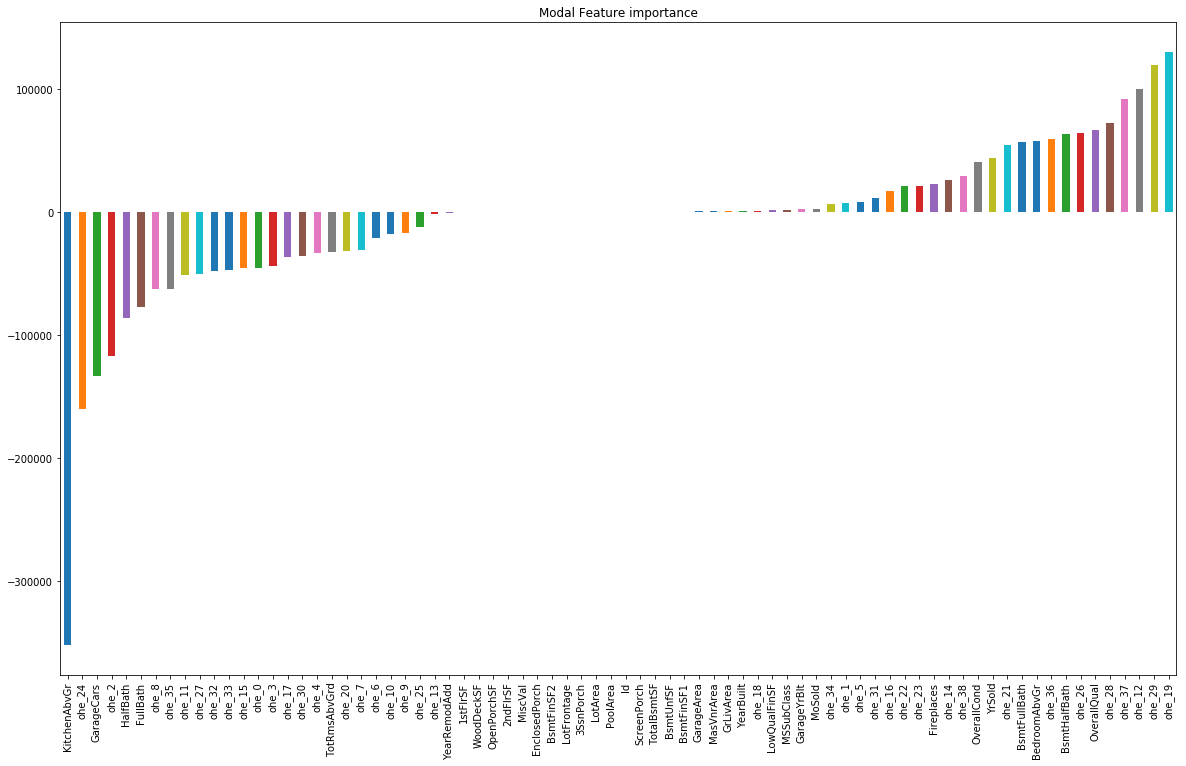

In [39]:
#checking the magnitude of coefficients
predictors = onehot_housing_X_train_pca.columns
coef = Series(regr.coef_.ravel(),predictors).sort_values()

fig, ax = plt.subplots(1,1,figsize=(20,12))
coef.plot(kind='bar', title='Modal Feature importance')

We can see that some of the coefficients are much higher as compared to rest of the coefficients, which will drive the predition.

How can we reduce the magnitude of coefficients in our model? For this purpose, we have different types of regression techniques which uses regularization to overcome this problem.

Now, there are two options:-
1. Use feature selection
    - Appart from different feature selection techniques available, we can use Lasso Regularization, that makes some feature coeffecient zero and doing feature selection indirectly.
2. Use Regularization
    - Ridge Regression (coeffecient are small but not Zero)

### Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.3, normalize=True)
ridgeReg.fit(onehot_housing_X_train_pca, housing_y_train)
housing_y_test_pred = ridgeReg.predict(onehot_housing_X_test_pca)

In [41]:
r2_sco = r2_score(housing_y_test, housing_y_test_pred)
r2_sco

0.796834126777241

In [42]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

0.7850474043612641

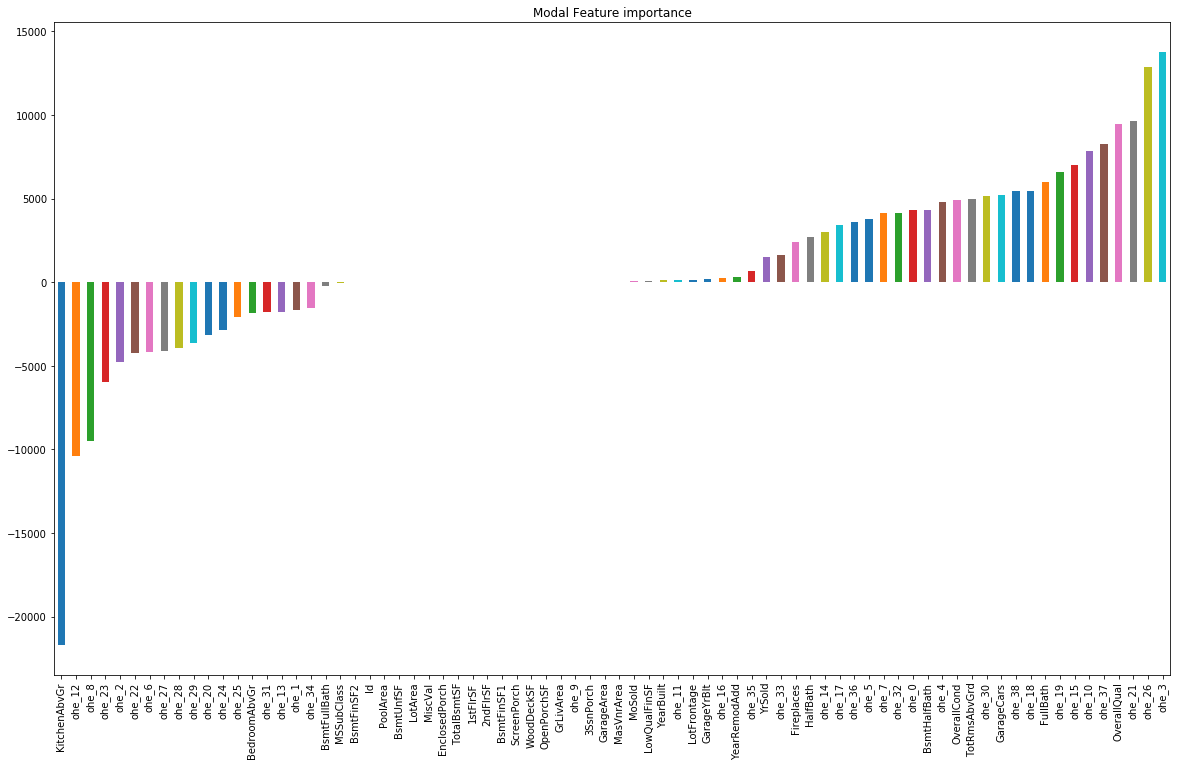

In [43]:
#checking the magnitude of coefficients
predictors = onehot_housing_X_train_pca.columns
coef = Series(ridgeReg.coef_.flatten(),predictors).sort_values()

fig, ax = plt.subplots(1,1,figsize=(20,12))
coef.plot(kind='bar', title='Modal Feature importance')

__As we can see the Adjusted R2 score has improved as compared to without Regularization. Also the magnitude of coefficient has also reduced.__

__Take aways:- __
1. It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
2. It reduces the model complexity by coefficient shrinkage.
3. It uses L2 regularization technique. 

### Lasso regression

In [44]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(onehot_housing_X_train_pca, housing_y_train)
housing_y_test_pred = lassoReg.predict(onehot_housing_X_test_pca)

/Users/samyam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [45]:
r2_sco = r2_score(housing_y_test, housing_y_test_pred)
r2_sco

-0.9405278423641414

In [46]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

-1.0531080836005344

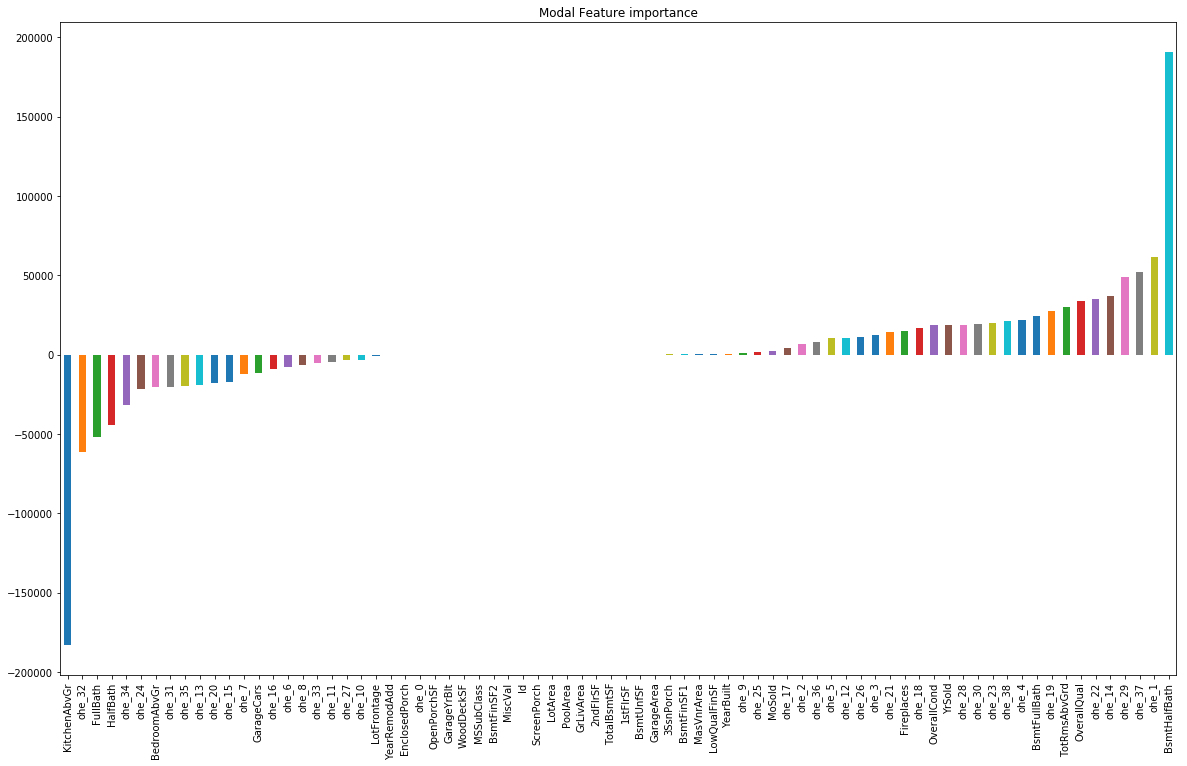

In [47]:
#checking the magnitude of coefficients
predictors = onehot_housing_X_train_pca.columns
coef = Series(lassoReg.coef_,predictors).sort_values()

fig, ax = plt.subplots(1,1,figsize=(20,12))
coef.plot(kind='bar', title='Modal Feature importance')

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge


__Take aways:-__
1. It uses L1 regularization technique (will be discussed later in this article)
2. It is generally used when we have more number of features, because it automatically does feature selection.

### Elastic Net Regression

Let’s think of an example where we have a large dataset, lets say it has 10,000 features. And we know that some of the independent features are correlated with other independent features. Then think, which regression would you use, Rigde or Lasso?

Let’s discuss it one by one. If we apply ridge regression to it, it will retain all of the features but will shrink the coefficients. But the problem is that model will still remain complex as there are 10,000 features, thus may lead to poor model performance.

Instead of ridge what if we apply lasso regression to this problem. The main problem with lasso regression is when we have correlated variables, it retains only one variable and sets other correlated variables to zero. That will possibly lead to some loss of information resulting in lower accuracy in our model.

Then what is the solution for this problem? Actually we have another type of regression, known as elastic net regression, which is basically a hybrid of ridge and lasso regression. So let’s try to understand it.

In [48]:
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha=0.5, l1_ratio=0.5, normalize=False)
ENreg.fit(onehot_housing_X_train_pca, housing_y_train)
housing_y_test_pred = ENreg.predict(onehot_housing_X_test_pca)

/Users/samyam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [49]:
r2_sco = r2_score(housing_y_test, housing_y_test_pred)
r2_sco

0.7509123053761444

In [50]:
num_observations = housing_y_test.shape[0]
num_independent_var = housing_X_train.shape[1]
adj_r2_sco = 1 - ((1- r2_sco)*((num_observations - 1 )/(num_observations - num_independent_var - 1)))
adj_r2_sco

0.736461416222394

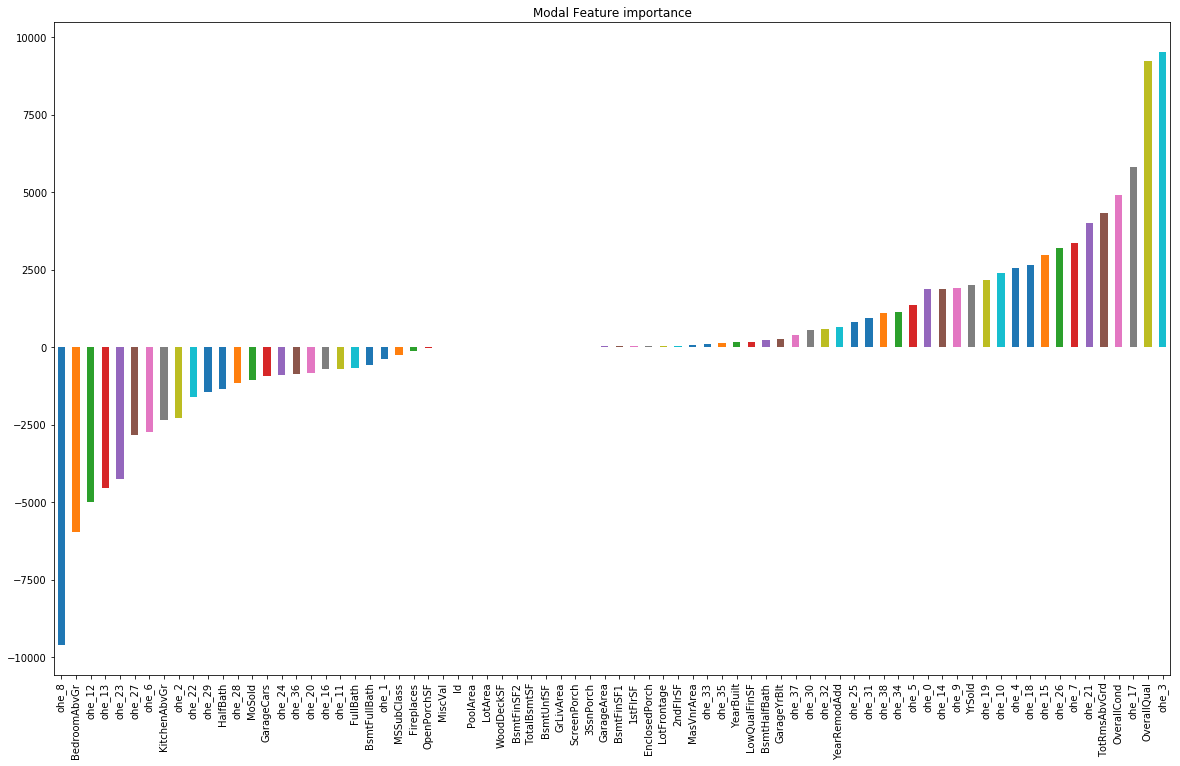

In [51]:
#checking the magnitude of coefficients
predictors = onehot_housing_X_train_pca.columns
coef = Series(ENreg.coef_,predictors).sort_values()

fig, ax = plt.subplots(1,1,figsize=(20,12))
coef.plot(kind='bar', title='Modal Feature importance')

__ElasticNet performs better than Lasso & worse than Ridge.__

## Reference

1. https://www.quora.com/What-is-regularization-in-machine-learning
2. https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
3. https://www.coursera.org/lecture/ml-regression/can-we-use-regularization-for-feature-selection-0FyEi
